In [1]:
import pandas as pd
import math

In [ ]:
retail_df=pd.read_excel('../data/Online_Retail.xlsx')


In [4]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
(retail_df['Quantity']==0).sum()

0

In [9]:
retail_df=retail_df[retail_df['Quantity']>0]
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df=retail_df[retail_df['CustomerID'].notnull()]

In [10]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [12]:
retail_df['CustomerID']=retail_df['CustomerID'].astype(int)
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [14]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
retail_df.shape

(397884, 8)

In [16]:
retail_df.drop_duplicates(inplace=True)
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int32         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.5+ MB


In [17]:
retail_df['StockCode'].value_counts()

StockCode
85123A    2023
22423     1713
85099B    1615
84879     1395
47566     1389
          ... 
90059A       1
20678        1
90059D       1
90168        1
23843        1
Name: count, Length: 3665, dtype: int64

In [18]:
retail_df['CustomerID'].value_counts()

CustomerID
17841    7676
14911    5670
14096    5111
12748    4412
14606    2677
         ... 
16765       1
13302       1
13270       1
16148       1
17846       1
Name: count, Length: 4338, dtype: int64

In [20]:
#제품수, 거래건수, 고객수
df1=pd.DataFrame([{'Product':len(retail_df['StockCode'].value_counts()),
                   'Transaction':len(retail_df['InvoiceNo'].value_counts()),
                   'Customer':len(retail_df['CustomerID'].value_counts())}],
                   columns=['Product','Transaction','Customer'],
                   index=['counts'])
df1

,Product,Transaction,Customer
counts,3665,18532,4338


In [21]:
retail_df['Country'].value_counts()

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [24]:
retail_df['SaleAmount']=retail_df['UnitPrice']*retail_df['Quantity']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [25]:
customer_df=retail_df.groupby('CustomerID')['SaleAmount'].sum()
customer_df

CustomerID
12346    77183.60
12347     4310.00
12348     1797.24
12349     1757.55
12350      334.40
           ...   
18280      180.60
18281       80.82
18282      178.05
18283     2045.53
18287     1837.28
Name: SaleAmount, Length: 4338, dtype: float64

In [27]:
# 고객의 주문횟수, 주문 총액, 마지막 주문 후 경과일
aggregations={'InvoiceNo':'count', 'SaleAmount':'sum', 'InvoiceDate':'max'}
customer_df=retail_df.groupby('CustomerID').agg(aggregations)
customer_df=customer_df.reset_index()
customer_df

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00
...,...,...,...,...
4333,18280,10,180.60,2011-03-07 09:52:00
4334,18281,7,80.82,2011-06-12 10:53:00
4335,18282,12,178.05,2011-12-02 11:43:00
4336,18283,721,2045.53,2011-12-06 12:02:00


In [28]:
customer_df=customer_df.rename(columns={'InvoiceNo':'Freq',
                                         'InvoiceDate':'ElapsedDays'})
customer_df

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00
...,...,...,...,...
4333,18280,10,180.60,2011-03-07 09:52:00
4334,18281,7,80.82,2011-06-12 10:53:00
4335,18282,12,178.05,2011-12-02 11:43:00
4336,18283,721,2045.53,2011-12-06 12:02:00


In [29]:
import datetime
customer_df['ElapsedDays']=datetime.datetime(2011,12,31)-customer_df['ElapsedDays']
customer_df

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,346 days 13:59:00
1,12347,182,4310.00,23 days 08:08:00
2,12348,31,1797.24,96 days 10:47:00
3,12349,73,1757.55,39 days 14:09:00
4,12350,17,334.40,331 days 07:59:00
...,...,...,...,...
4333,18280,10,180.60,298 days 14:08:00
4334,18281,7,80.82,201 days 13:07:00
4335,18282,12,178.05,28 days 12:17:00
4336,18283,721,2045.53,24 days 11:58:00


In [30]:
customer_df['ElapsedDays']=customer_df['ElapsedDays'].apply(lambda x:x.days+1)
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,347
1,12347,182,4310.00,24
2,12348,31,1797.24,97
3,12349,73,1757.55,40
4,12350,17,334.40,332


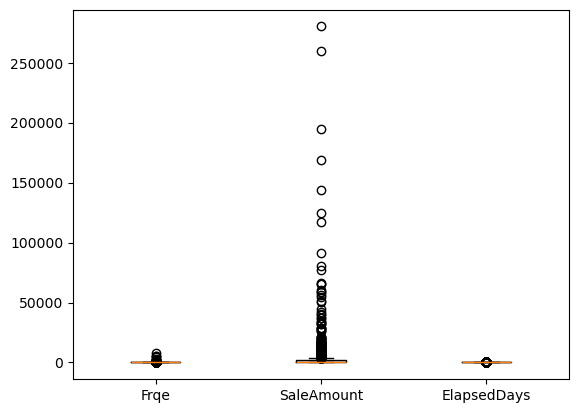

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax=plt.subplots()
ax.boxplot([customer_df['Freq'], customer_df['SaleAmount'],
            customer_df['ElapsedDays']], sym='o')
plt.xticks([1,2,3], ['Frqe','SaleAmount','ElapsedDays'])
plt.show()


In [33]:
import numpy as np
customer_df['Freq_log']=np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log']=np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDay_log']=np.log1p(customer_df['ElapsedDays'])
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDay_log
0,12346,1,77183.60,347,0.693147,11.253955,5.852202
1,12347,182,4310.00,24,5.209486,8.368925,3.218876
2,12348,31,1797.24,97,3.465736,7.494564,4.584967
3,12349,73,1757.55,40,4.304065,7.472245,3.713572
4,12350,17,334.40,332,2.890372,5.815324,5.808142


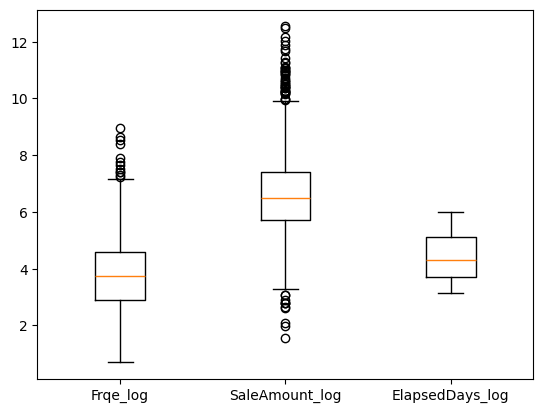

In [35]:
fig, ax=plt.subplots()
ax.boxplot([customer_df['Freq_log'], customer_df['SaleAmount_log'],
            customer_df['ElapsedDay_log']], sym='o')
plt.xticks([1,2,3], ['Frqe_log','SaleAmount_log','ElapsedDays_log'])
plt.show()

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [40]:
x_features=customer_df[['Freq_log','SaleAmount_log','ElapsedDay_log']].values
x_features

array([[ 0.69314718, 11.25395523,  5.85220248],
       [ 5.20948615,  8.36892517,  3.21887582],
       [ 3.4657359 ,  7.49456369,  4.58496748],
       ...,
       [ 2.56494936,  5.1876651 ,  3.40119738],
       [ 6.58202514,  7.62390095,  3.25809654],
       [ 4.26267988,  7.51658563,  4.17438727]])

In [41]:
from sklearn.preprocessing import StandardScaler
x_features_scalde=StandardScaler().fit_transform(x_features)
x_features_scalde

array([[-2.43820181,  3.7077163 ,  1.75491769],
       [ 1.18898578,  1.41490344, -1.41929401],
       [-0.21146474,  0.72002428,  0.22739274],
       ...,
       [-0.9349095 , -1.11333158, -1.19952363],
       [ 2.29130702,  0.82281217, -1.37201737],
       [ 0.42858139,  0.73752572, -0.26752061]])

c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

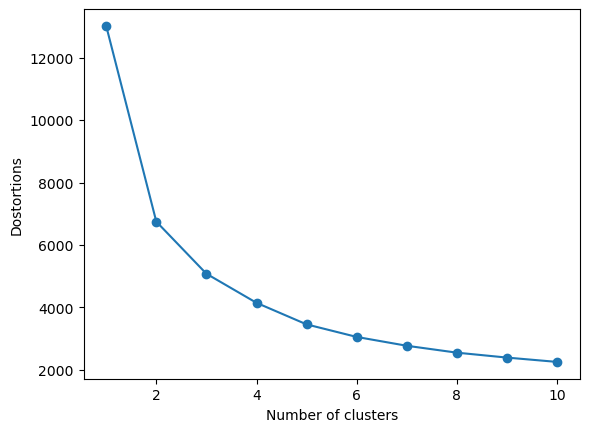

In [44]:
distortions=[]
for i in range(1, 11):
    kmeans_i=KMeans(n_clusters=i, random_state=0)
    kmeans_i.fit(x_features_scalde)
    distortions.append(kmeans_i.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Dostortions')
plt.show()

In [45]:
kmeans=KMeans(n_clusters=3, random_state=0)
y_label=kmeans.fit_predict(x_features_scalde)
customer_df['ClusterLabel']=y_label
customer_df

c:\Users\it\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDay_log,ClusterLabel
0,12346,1,77183.60,347,0.693147,11.253955,5.852202,0
1,12347,182,4310.00,24,5.209486,8.368925,3.218876,1
2,12348,31,1797.24,97,3.465736,7.494564,4.584967,2
3,12349,73,1757.55,40,4.304065,7.472245,3.713572,1
4,12350,17,334.40,332,2.890372,5.815324,5.808142,0
...,...,...,...,...,...,...,...,...
4333,18280,10,180.60,299,2.397895,5.201806,5.703782,0
4334,18281,7,80.82,202,2.079442,4.404522,5.313206,0
4335,18282,12,178.05,29,2.564949,5.187665,3.401197,2
4336,18283,721,2045.53,25,6.582025,7.623901,3.258097,1


In [48]:
group_customer=customer_df.groupby('ClusterLabel').agg({'Freq':'mean',
                                                        'SaleAmount':'mean',
                                                        'ElapsedDays':'mean'})
group_customer

,Freq,SaleAmount,ElapsedDays
ClusterLabel,,,
0,20.931748,437.247101,239.519939
1,221.855234,5345.401330,52.443950
2,39.453468,661.993529,66.279787
